In [98]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt
%matplotlib inline
plt.rc("font", size=14)
plt.rcParams['figure.figsize'] = [12,8]
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [54]:
url = 'https://raw.githubusercontent.com/madmashup/targeted-marketing-predictive-engine/master/banking.csv'
data = pd.read_csv(url,header=0,low_memory=False)

In [71]:
data
data = data.dropna()

In [72]:
data['education'].unique()
data['education'] = np.where(data['education'] == 'basic.9y','Basic',data['education'])
data['education'] = np.where(data['education'] =='basic.6y', 'Basic', data['education'])
data['education'] = np.where(data['education'] =='basic.4y', 'Basic', data['education'])

In [73]:
data['y'].value_counts()

0    36548
1     4640
Name: y, dtype: int64

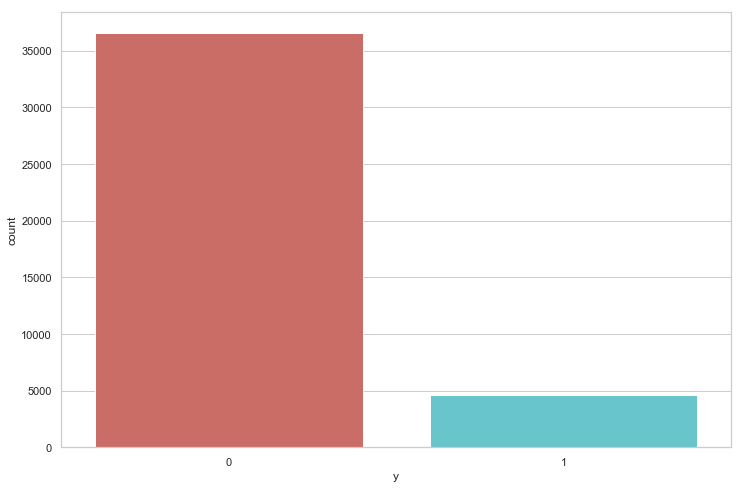

In [74]:
sns.countplot(x='y',data=data,palette='hls')
plt.show()

In [75]:
data.groupby('y').mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
y,,,,,,,,,,
0,39.911185,220.844807,2.633085,984.113878,0.132374,0.248875,93.603757,-40.593097,3.811491,5176.166600
1,40.913147,553.191164,2.051724,792.035560,0.492672,-1.233448,93.354386,-39.789784,2.123135,5095.115991


In [76]:
data.groupby('job').mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
job,,,,,,,,,,,
admin.,38.187296,254.312128,2.623489,954.319229,0.189023,0.015563,93.534054,-40.245433,3.550274,5164.125350,0.129726
blue-collar,39.555760,264.542360,2.558461,985.160363,0.122542,0.248995,93.656656,-41.375816,3.771996,5175.615150,0.068943
entrepreneur,41.723214,263.267857,2.535714,981.267170,0.138736,0.158723,93.605372,-41.283654,3.791120,5176.313530,0.085165
housemaid,45.500000,250.454717,2.639623,960.579245,0.137736,0.433396,93.676576,-39.495283,4.009645,5179.529623,0.100000
management,42.362859,257.058140,2.476060,962.647059,0.185021,-0.012688,93.522755,-40.489466,3.611316,5166.650513,0.112175
retired,62.027326,273.712209,2.476744,897.936047,0.327326,-0.698314,93.430786,-38.573081,2.770066,5122.262151,0.252326
self-employed,39.949331,264.142153,2.660802,976.621393,0.143561,0.094159,93.559982,-40.488107,3.689376,5170.674384,0.104856
services,37.926430,258.398085,2.587805,979.974049,0.154951,0.175359,93.634659,-41.290048,3.699187,5171.600126,0.081381
student,25.894857,283.683429,2.104000,840.217143,0.524571,-1.408000,93.331613,-40.187543,1.884224,5085.939086,0.314286


In [96]:
mStatus = data.groupby('marital').mean()
mStatus
mStatus['index'] = mStatus.index.values
mStatus

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y,index
marital,,,,,,,,,,,,
divorced,44.899393,253.790330,2.61340,968.639853,0.168690,0.163985,93.606563,-40.707069,3.715603,5170.878643,0.103209,divorced
married,42.307165,257.438623,2.57281,967.247673,0.155608,0.183625,93.597367,-40.270659,3.745832,5171.848772,0.101573,married
single,33.158714,261.524378,2.53380,949.909578,0.211359,-0.167989,93.517300,-40.918698,3.317447,5155.199265,0.140041,single
unknown,40.275000,312.725000,3.18750,937.100000,0.275000,-0.221250,93.471250,-40.820000,3.313038,5157.393750,0.150000,unknown


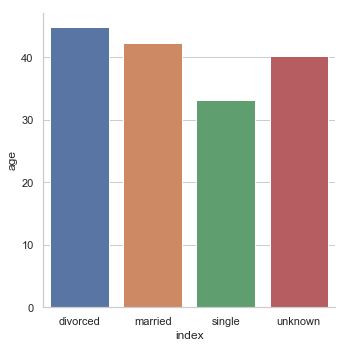

In [99]:
sns.catplot(x='index',y='age',data=mStatus, kind='bar')
plt.show()

Text(0, 0.5, 'Frequency of Y Purchase')

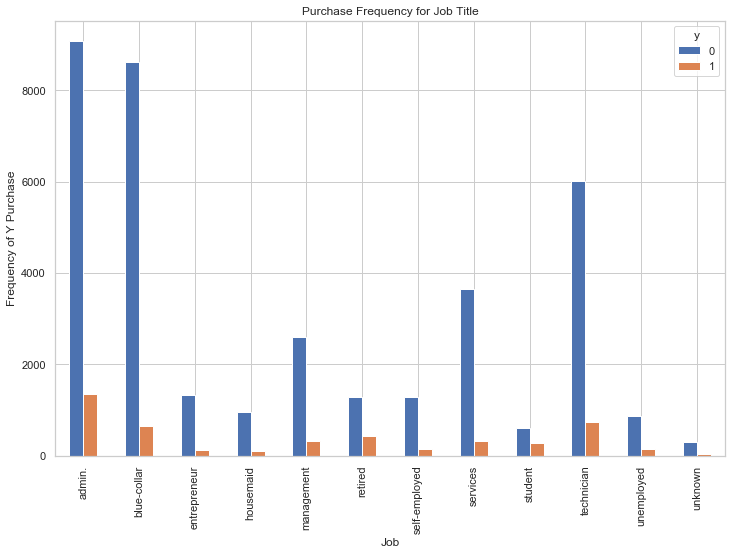

In [102]:
pd.crosstab(data.job,data.y).plot(kind='bar')
plt.title('Purchase Frequency for Job Title')
plt.xlabel('Job')
plt.ylabel('Frequency of Y Purchase')

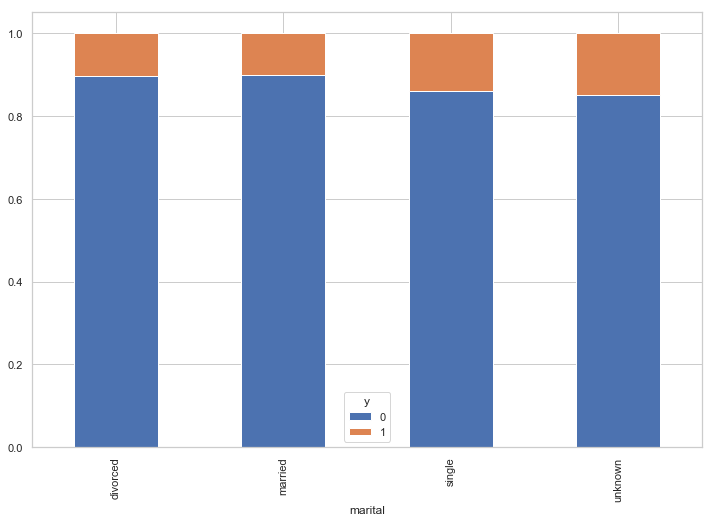

In [113]:
#Same plot as above ---->>>pd.crosstab(data.marital,data.y).plot(kind='bar')
maritaltable = pd.crosstab(data.marital,data.y)
#plt.title('Purchase Frequency for Job Title')
#Maritablesum adds them up along the rows all the numbers and then divide all the values by the sum so they
#get coverted to the percentage
maritaltable.divide(maritaltable.sum(1).astype(float),axis=0).plot(kind='bar',stacked='True')

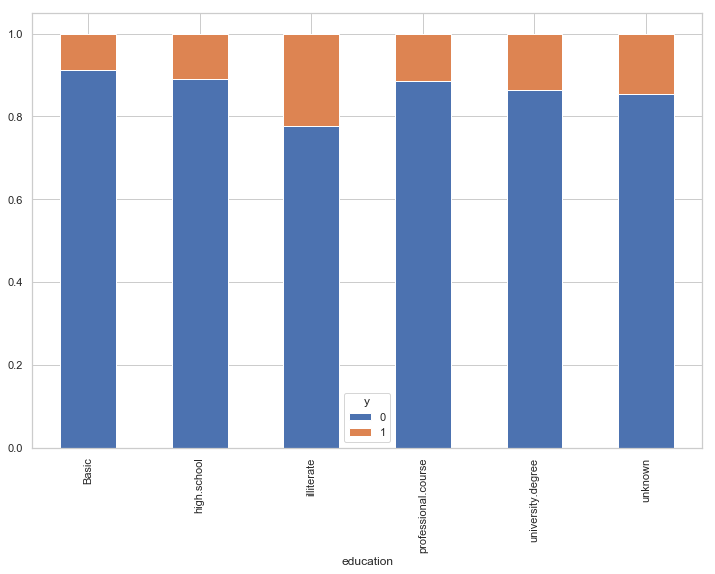

In [114]:
monthtab = pd.crosstab(data.education,data.y)
monthtab.div(monthtab.sum(1).astype(float),axis=0).plot(kind='bar',stacked='True')

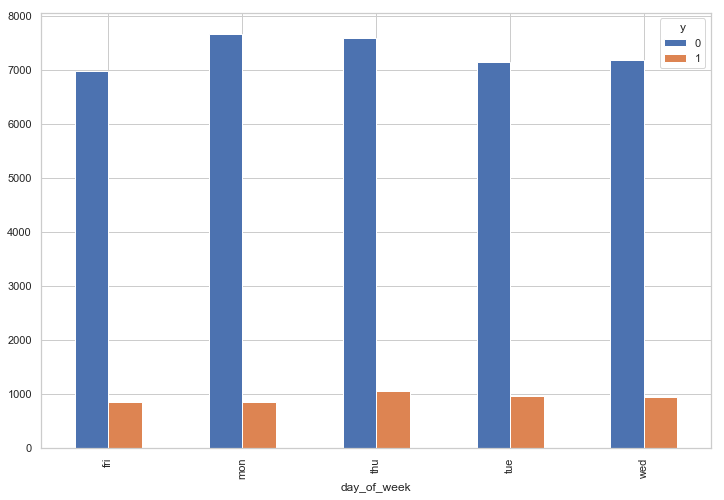

In [117]:
daytab = pd.crosstab(data.day_of_week,data.y)
daytab.plot(kind='bar')
#Not a good predictor because the values for months are almost in same ratio for all the months.

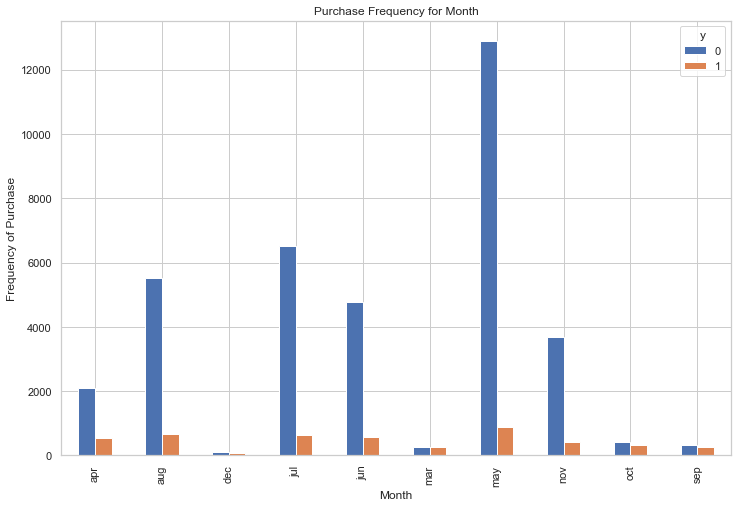

In [118]:
pd.crosstab(data.month,data.y).plot(kind='bar')
plt.title('Purchase Frequency for Month')
plt.xlabel('Month')
plt.ylabel('Frequency of Purchase')
plt.savefig('pur_fre_month_bar')

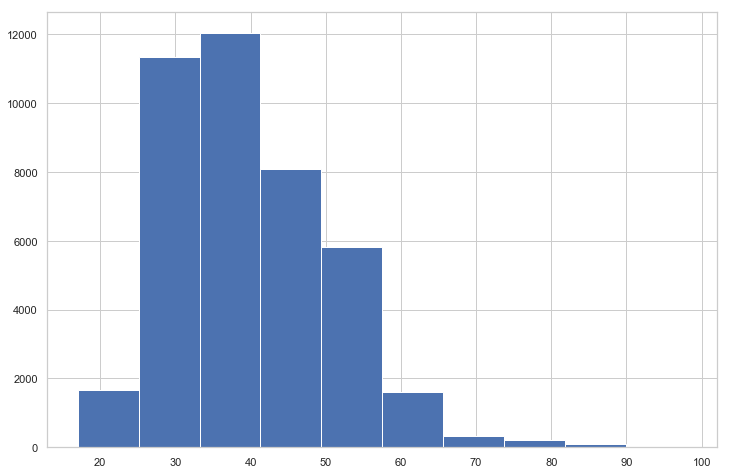

In [125]:
data.age.hist()
plt.show()